In [67]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
datasetname='1st-FEC2+.csv'
strlist = datasetname.split('.') 
savename=strlist[0]
dataset = pd.read_csv(datasetname)
print(dataset.head())
col = dataset.columns.values.tolist()
headers =col[0:-1]
features = np.array(dataset[headers])
labels = dataset['FEC2+']

   Cu  Pd  Au  Ag  Bi  Sn  Co  Ni  In  Fe  ...  aromatic amine  carboxy   \
0   0   0   0   1   0   0   0   0   0   0  ...               0         0   
1   0   0   0   0   0   1   0   0   0   0  ...               0         1   
2   1   0   0   0   0   0   0   0   0   0  ...               0         1   
3   0   0   0   0   0   0   1   0   0   0  ...               0         1   
4   0   0   0   0   1   0   0   0   0   0  ...               0         1   

   pyridine   imidazole   pyrrole   triazole   cyano  phosphate   alkynyl  \
0          1           0         0          0      0           0        0   
1          0           0         0          0      0           0        0   
2          0           0         0          1      0           0        0   
3          0           0         0          1      0           0        0   
4          0           0         0          0      0           0        0   

   FEC2+  
0      0  
1      0  
2      0  
3      1  
4      0  

[5 rows x 26 

In [68]:
TXT_NAME= 'dataforplot_'+str(savename)+'.txt'
plot_tree_name_1='DecisionTree of '+str(savename)
plot_tree_name_2= 'Feature importance of Decision Tree model in '+str(savename)+'.png'
plot_tree_name_3= 'Confusion Matrix of Decision Tree model in '+str(savename)+'.png'
plot_tree_name_4= 'ROC curve of Decision Tree model in '+str(savename)+'.png'

plot_rf_name_1= 'Feature importance of random forest model in '+str(savename)+'.png'
plot_rf_name_2= 'Confusion Matrix of random forest model in '+str(savename)+'.png'
plot_rf_name_3= 'ROC curve of random forest model in '+str(savename)+'.png'

plot_gbct_name_1= 'Feature importance of GBCT model in '+str(savename)+'.png'
plot_gbct_name_2= 'Confusion Matrix of GBCT model in '+str(savename)+'.png'
plot_gbct_name_3= 'ROC curve of GBCT model in '+str(savename)+'.png'

plot_lr_name_1= 'Feature importance of SGD linear model in '+str(savename)+'.png'
plot_lr_name_2= 'Confusion Matrix of SGD linear model in '+str(savename)+'.png'
plot_lr_name_3= 'ROC curve of SGD linear model in '+str(savename)+'.png'

plot_xgb_name_1= 'Feature importance of XGBoost model in '+str(savename)+'.png'
plot_xgb_name_2= 'Confusion Matrix of XGBoost model in '+str(savename)+'.png'
plot_xgb_name_3= 'ROC curve of XGBoost model in '+str(savename)+'.png'


In [69]:
from sklearn.model_selection import StratifiedShuffleSplit
X=features
y=labels

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.15, random_state=19)

# TRAIN_TEST_SPLIT=0.85
# point = round(X.shape[0]*TRAIN_TEST_SPLIT)
# permutation = np.random.permutation(y.shape[0])
# X_train = X[permutation[:point], :]
# y_train = y[permutation[:point]]
# X_test = X[permutation[point:], :]
# y_test = y[permutation[point:]]
cv = StratifiedShuffleSplit(n_splits=50, test_size=0.15, random_state=4)

In [70]:
# 搭建决策树
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import joblib
tuned_parameters = [{'min_impurity_decrease': [0.01, 0.02, 0.03, 0.04], 'max_depth': [3, 4, 5, 6, 7, 8], 
                     'max_features': ['sqrt', 'log2'], 'max_leaf_nodes': [3,4,5,6,7, 8,9], 'class_weight': ['balanced'], 
                      'min_samples_split': [3,4,5]}]
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, tuned_parameters, verbose=1, scoring=None, cv=cv, n_jobs=16)
clf.fit(X_train, y_train)
clf_new = clf.best_estimator_
best_p = clf.best_params_
paras = clf_new.get_params()
print(best_p)
acc_unique = clf_new.score(X_test, y_test)
print('Current accuracy:', acc_unique)

Fitting 50 folds for each of 1008 candidates, totalling 50400 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=16)]: Done 640 tasks      | elapsed:    1.8s
[Parallel(n_jobs=16)]: Done 4640 tasks      | elapsed:    4.1s
[Parallel(n_jobs=16)]: Done 10240 tasks      | elapsed:    7.3s
[Parallel(n_jobs=16)]: Done 17440 tasks      | elapsed:   12.2s
[Parallel(n_jobs=16)]: Done 29184 tasks      | elapsed:   19.4s
[Parallel(n_jobs=16)]: Done 49926 tasks      | elapsed:   30.5s


{'class_weight': 'balanced', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.01, 'min_samples_split': 5}
Current accuracy: 0.7647058823529411


[Parallel(n_jobs=16)]: Done 50400 out of 50400 | elapsed:   30.9s finished


In [71]:
clf=clf.best_estimator_

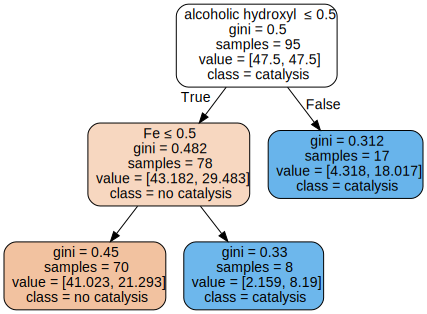

In [72]:
title=headers
import graphviz  
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=title,  
                    class_names=['no catalysis', 'catalysis'],  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render(plot_tree_name_1) 
graph

feature_name: alcoholic hydroxyl  importance:  0.6047897764236838
feature_name: Fe importance:  0.39521022357631613
feature_name: cyano importance:  0.0
feature_name: triazole  importance:  0.0
feature_name: pyrrole  importance:  0.0


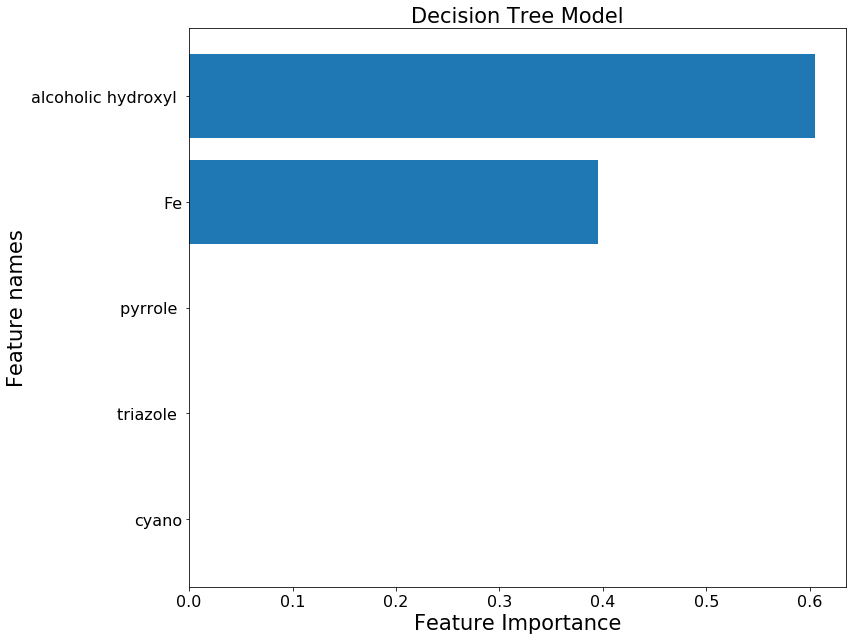

In [73]:
p = np.argsort(-clf.feature_importances_)
feat=[]
importance=[]
for i in range(5):
    print('feature_name:', title[p[i]], 'importance: ', clf.feature_importances_[p[i]])
    feat.append(title[p[i]])
    importance.append(clf.feature_importances_[p[i]])
feat=np.array(feat)
importance=np.array(importance)
# Plot the feature importances of the forest
tree_feature_importances = importance
sorted_idx = tree_feature_importances.argsort()
y_ticks = np.arange(0, len(feat))

#设置输出的图片大小
figsize = 12,9
fig, ax = plt.subplots(figsize=figsize)

ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feat[sorted_idx])
ax.set_yticks(y_ticks)
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 21,}
ax.set_xlabel('Feature Importance',font1)
ax.set_ylabel('Feature names',font1)
ax.set_title("Decision Tree Model",font1)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# # 设置坐标标签字体大小
# ax.set_xlabel(..., fontsize=20)
# ax.set_ylabel(..., fontsize=20)
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=16)


fig.tight_layout()
plt.savefig(plot_tree_name_2, bbox_inches='tight',dpi=600)
plt.show()

In [74]:
str_array=",".join(map(str, importance[sorted_idx[:5]]))
str_array1=",".join(map(str, np.array(headers)[sorted_idx]))
with open(TXT_NAME, 'w',encoding='utf-8') as w:
    w.write(str_array1)
    w.write(str_array+'\n')
    w.close()

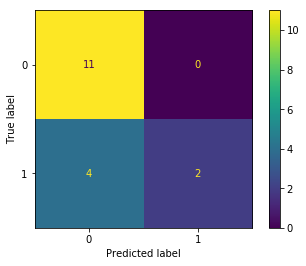

In [75]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  # doctest: +SKIP
plt.savefig(plot_tree_name_3, bbox_inches='tight',dpi=600)
plt.show()  # doctest: +SKIP

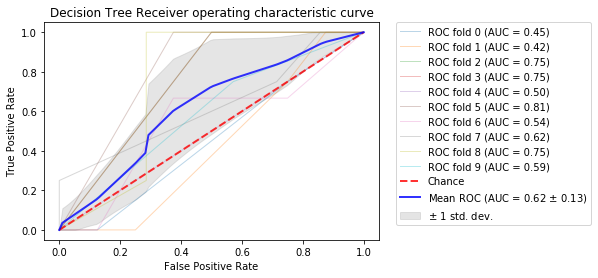

[0.41666667 0.5        0.90909091 0.81818182 0.72727273 0.81818182
 0.54545455 0.36363636 0.63636364 0.54545455]


In [76]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation
n_samples, n_features = X.shape
from sklearn.model_selection import  StratifiedKFold
n_splits=10
cv = StratifiedKFold(n_splits)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    clf.fit(X[train], y[train])
    viz = plot_roc_curve(clf, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Decision Tree Receiver operating characteristic curve")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(plot_tree_name_4, bbox_inches='tight',dpi=600)
plt.show()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=10)
print(scores)


In [77]:
# 搭建随机森林模型
import sklearn.ensemble
tuned_parameters = [{'min_impurity_decrease': [0.0], 'max_depth': [4,5,6,7,8,9], 
                     'max_features': ['auto'], 'max_leaf_nodes': [4, 5,6,7,8],'criterion':["gini" ,"entropy"]}]
rf = sklearn.ensemble.RandomForestClassifier()
rf = GridSearchCV(rf, tuned_parameters, verbose=1, scoring=None, cv=cv, n_jobs=16)
rf.fit(X_train, y_train)
rf_new = rf.best_estimator_
best_p = rf.best_params_
paras = rf_new.get_params()
print(best_p)
acc_unique = rf_new.score(X_test, y_test)
print('Current accuracy:', acc_unique)
rf=rf.best_estimator_

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    3.4s
[Parallel(n_jobs=16)]: Done 569 out of 600 | elapsed:    6.1s remaining:    0.3s


{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.0}
Current accuracy: 0.6470588235294118


[Parallel(n_jobs=16)]: Done 600 out of 600 | elapsed:    6.4s finished


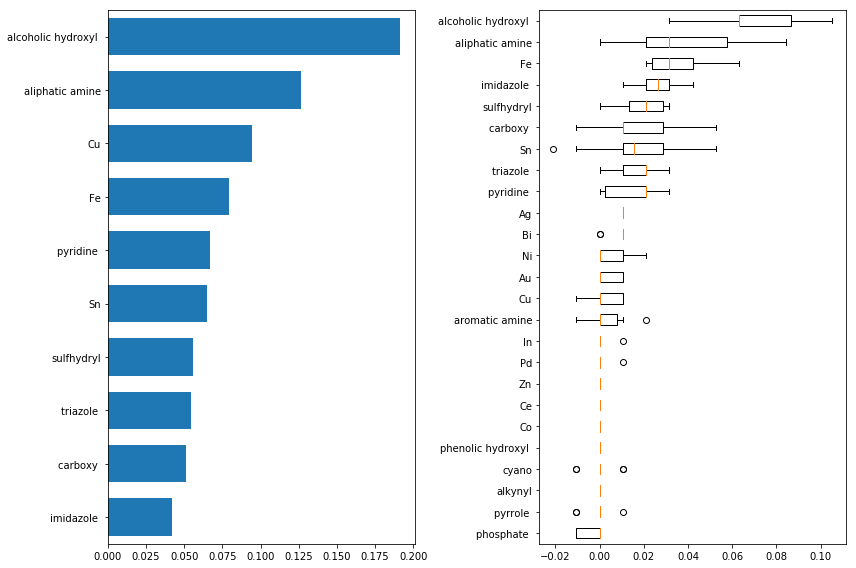

In [78]:
# 将float_list[num]改为np.array(float_list)[num]取消报错
from sklearn.inspection import permutation_importance
result = permutation_importance(rf, X_train, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(rf.feature_importances_)
tree_indices = np.arange(0, len(rf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices[len(headers)-10:],
         rf.feature_importances_[tree_importance_sorted_idx[len(headers)-10:]], height=0.7)
ax1.set_yticklabels(np.array(headers)[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((len(headers)-10,len(headers)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=np.array(headers)[perm_sorted_idx])
fig.tight_layout()
plt.savefig(plot_rf_name_1, dpi=600)
plt.show()


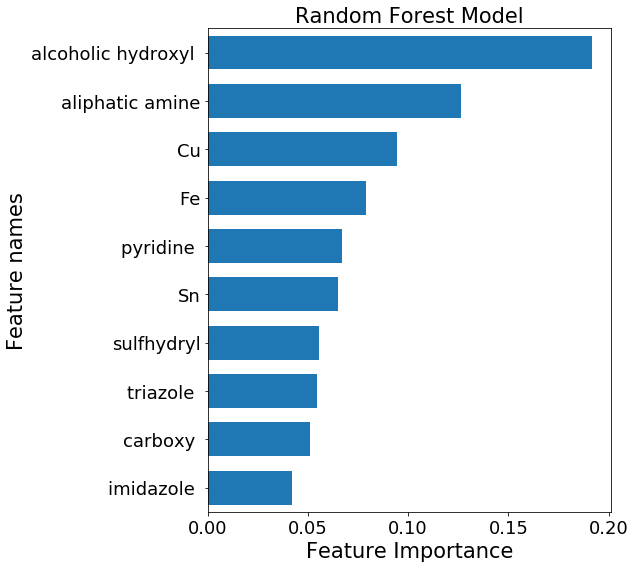

In [79]:
# 直接画图放文章
from sklearn.inspection import permutation_importance


tree_importance_sorted_idx = np.argsort(rf.feature_importances_)
tree_indices = np.arange(0, len(rf.feature_importances_)) + 0.5

fig, (ax1) = plt.subplots(figsize=(9, 8))
ax1.barh(tree_indices[len(headers)-10:],
         rf.feature_importances_[tree_importance_sorted_idx[len(headers)-10:]], height=0.7)
ax1.set_yticklabels(np.array(headers)[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((len(headers)-10,len(headers)))
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 21,}
ax1.set_xlabel('Feature Importance',font1)
ax1.set_ylabel('Feature names',font1)
ax1.set_title("Random Forest Model",font1)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# # 设置坐标标签字体大小
# ax.set_xlabel(..., fontsize=20)
# ax.set_ylabel(..., fontsize=20)
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=18)
fig.tight_layout()
plt.savefig(plot_rf_name_1, dpi=600)
plt.show()


In [80]:
rf.feature_importances_[tree_importance_sorted_idx[len(headers)-10:]]

array([0.04202549, 0.05130297, 0.05470528, 0.05567885, 0.06514402,
       0.06706128, 0.07908909, 0.09434369, 0.12651128, 0.19154664])

In [81]:
tree_indices[:-60]

array([], dtype=float64)

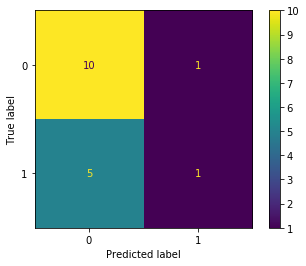

In [82]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test)  # doctest: +SKIP
plt.savefig(plot_rf_name_2, bbox_inches='tight',dpi=600)
plt.show()  # doctest: +SKIP

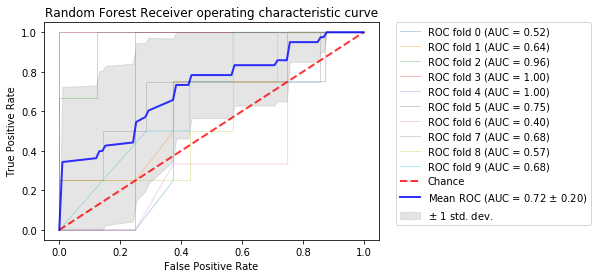

[0.66666667 0.75       0.81818182 0.72727273 0.81818182 0.72727273
 0.36363636 0.81818182 0.72727273 0.54545455]


In [83]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation
n_samples, n_features = X.shape
from sklearn.model_selection import  StratifiedKFold
cv = StratifiedKFold(n_splits)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    rf.fit(X[train], y[train])
    viz = plot_roc_curve(rf, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Random Forest Receiver operating characteristic curve")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(plot_rf_name_3, bbox_inches='tight',dpi=600)
plt.show()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv=10)
print(scores)


In [84]:
#GBCT model
from sklearn.ensemble import GradientBoostingClassifier
tuned_parameters = [{'learning_rate': [0.0025,0.01,0.05], 'subsample': [0.5], 'min_impurity_decrease': [0.3,0.4, 0.5],
                     'max_depth': [4, 5, 6], 'warm_start': [False], 'max_features': ['sqrt'], 'max_leaf_nodes': [4, 5, 6],'n_estimators':[500,1000,5000]}]
gbct= GradientBoostingClassifier(verbose=0, validation_fraction=0.15, n_iter_no_change=50, tol=0.0001)

gbct = GridSearchCV(gbct, tuned_parameters, verbose=1, scoring=None, cv=cv, n_jobs=16)
gbct.fit(X_train, y_train)
gbct_new = gbct.best_estimator_
best_p = gbct.best_params_
paras = gbct_new.get_params()
print(best_p)
acc_unique = gbct_new.score(X_test, y_test)
print('Current accuracy:', acc_unique)
gbct=gbct.best_estimator_

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 248 tasks      | elapsed:    7.0s
[Parallel(n_jobs=16)]: Done 498 tasks      | elapsed:   14.0s
[Parallel(n_jobs=16)]: Done 848 tasks      | elapsed:   23.2s
[Parallel(n_jobs=16)]: Done 1298 tasks      | elapsed:   29.7s
[Parallel(n_jobs=16)]: Done 2000 tasks      | elapsed:   37.0s
[Parallel(n_jobs=16)]: Done 2399 out of 2430 | elapsed:   39.6s remaining:    0.5s


{'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.5, 'n_estimators': 5000, 'subsample': 0.5, 'warm_start': False}
Current accuracy: 0.5882352941176471


[Parallel(n_jobs=16)]: Done 2430 out of 2430 | elapsed:   40.0s finished


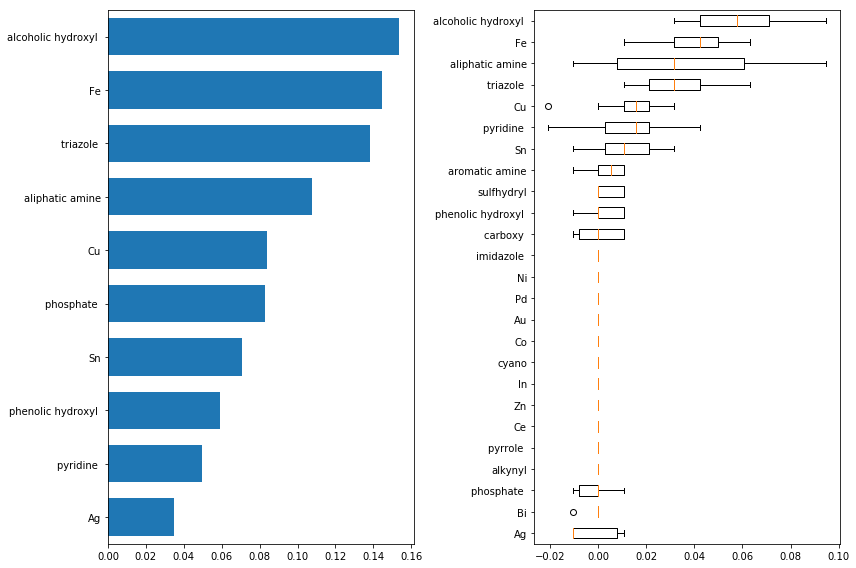

In [85]:
result = permutation_importance(gbct, X_train, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(gbct.feature_importances_)
tree_indices = np.arange(0, len(gbct.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices[len(headers)-10:],
         gbct.feature_importances_[tree_importance_sorted_idx[len(headers)-10:]], height=0.7)
ax1.set_yticklabels(np.array(headers)[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((len(headers)-10,len(headers)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=np.array(headers)[perm_sorted_idx])
fig.tight_layout()
plt.savefig(plot_gbct_name_1, dpi=600)
plt.show()

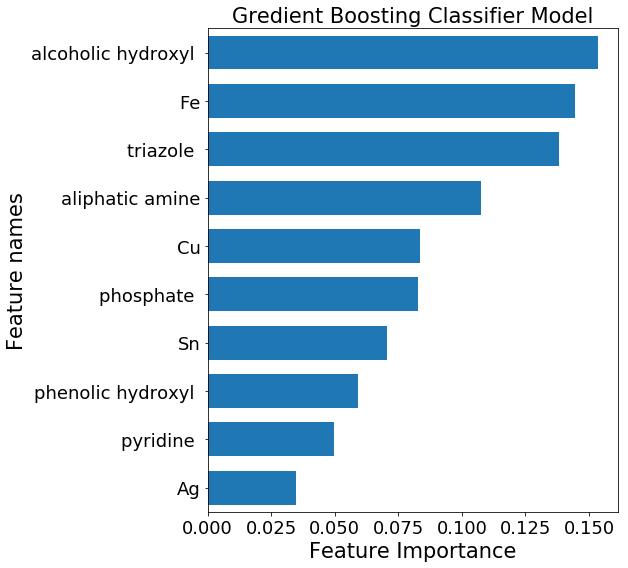

In [86]:
# 将float_list[num]改为np.array(float_list)[num]取消报错
from sklearn.inspection import permutation_importance


tree_importance_sorted_idx = np.argsort(gbct.feature_importances_)
tree_indices = np.arange(0, len(gbct.feature_importances_)) + 0.5

fig, (ax1) = plt.subplots(figsize=(9, 8))
ax1.barh(tree_indices[len(headers)-10:],
         gbct.feature_importances_[tree_importance_sorted_idx[len(headers)-10:]], height=0.7)
ax1.set_yticklabels(np.array(headers)[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((len(headers)-10,len(headers)))
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 21,}
ax1.set_xlabel('Feature Importance',font1)
ax1.set_ylabel('Feature names',font1)
ax1.set_title("Gredient Boosting Classifier Model",font1)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# # 设置坐标标签字体大小
# ax.set_xlabel(..., fontsize=20)
# ax.set_ylabel(..., fontsize=20)
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=18)
fig.tight_layout()
plt.savefig(plot_gbct_name_1, dpi=600)
plt.show()


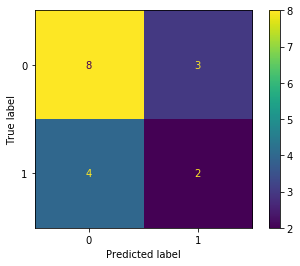

In [87]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbct, X_test, y_test)  # doctest: +SKIP
plt.savefig(plot_gbct_name_2, bbox_inches='tight',dpi=600)
plt.show()  # doctest: +SKIP

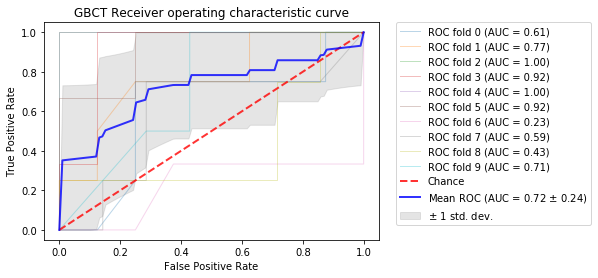

[0.66666667 0.75       0.90909091 0.72727273 0.72727273 0.72727273
 0.54545455 0.81818182 0.63636364 0.72727273]


In [88]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation
n_samples, n_features = X.shape
from sklearn.model_selection import  StratifiedKFold
cv = StratifiedKFold(n_splits)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    gbct.fit(X[train], y[train])
    viz = plot_roc_curve(gbct, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="GBCT Receiver operating characteristic curve")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(plot_gbct_name_3, bbox_inches='tight',dpi=600)
plt.show()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(gbct, X, y, cv=10)
print(scores)

Coefficients: 
 [[ 0.43705962 -0.16219142 -0.09235874  0.39309868  0.58020715 -1.14150032
  -0.3297067  -0.32793334 -0.36327939  1.08752371 -0.08097245  0.
   1.3120414  -0.03376059 -0.93271433 -1.08875876 -0.98051156  0.6118479
  -0.6377609  -0.28198239 -0.38869954  1.18655067  0.57600053  0.53375829
   0.        ]]
Mean squared error: 0.35
Coefficient of determination（R2 score）: -0.55
模型截距:
[-0.41399887]


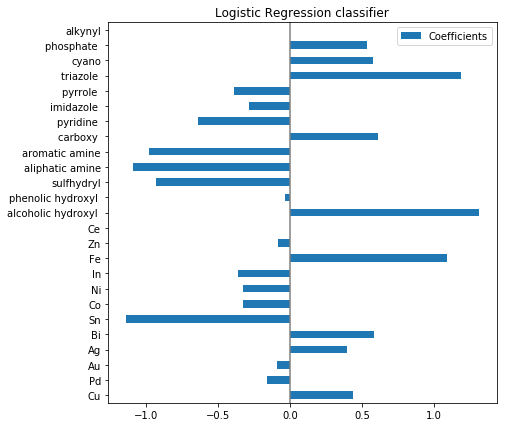

In [89]:
# 逻辑斯蒂
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', verbose=0, n_jobs=-1)

lr.fit(X_train, y_train)
coef = np.array(lr.coef_).flatten()
#Linear regression
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(X_test)
# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination（R2 score）: %.2f'
      % r2_score(y_test, y_pred))
# 训练后模型截距
print('模型截距:')
print(lr.intercept_)
coefs = pd.DataFrame(
   coef,
    columns=['Coefficients'], index=headers
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Logistic Regression classifier')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)


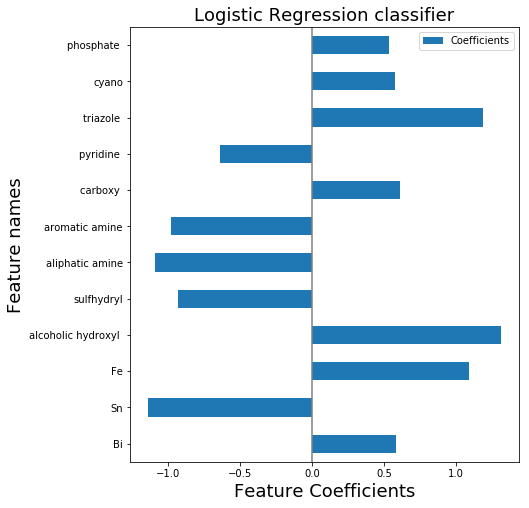

In [90]:
#coefs_copy=coefs.iloc[[idx for idx in range(len(coefs)) if coefs.iloc[idx].values>5e12 or coefs.iloc[idx].values <-5e12]]
coefs_copy=coefs.iloc[[idx for idx in range(len(coefs)) if coefs.iloc[idx].values>0.5 or coefs.iloc[idx].values <-0.5]]
coefs_copy.plot(kind='barh', figsize=(9, 8))
import matplotlib
plt.title('Logistic Regression classifier')
plt.axvline(x=0, color='.5')
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 18,}
plt.xlabel('Feature Coefficients',font1)
plt.ylabel('Feature names',font1)
plt.title('Logistic Regression classifier',font1)
ax.set_xticklabels(coefs_copy,font1)
plt.subplots_adjust(left=.3)
plt.savefig(plot_lr_name_1, bbox_inches='tight',dpi=600)

In [91]:
matplotlib.axes.Axes.get_xticks

<function matplotlib.axes._base._AxesBase.get_xticks(self, minor=False)>

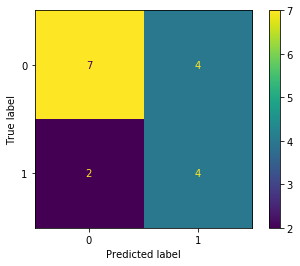

In [92]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test)  # doctest: +SKIP
plt.savefig(plot_lr_name_2, bbox_inches='tight',dpi=600)
plt.show()  # doctest: +SKIP

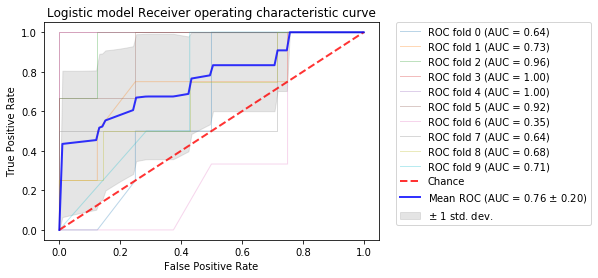

[0.66666667 0.75       0.81818182 1.         0.90909091 0.72727273
 0.45454545 0.63636364 0.63636364 0.72727273]


In [93]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
import matplotlib
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation
n_samples, n_features = X.shape
from sklearn.model_selection import  StratifiedKFold
cv = StratifiedKFold(n_splits)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    lr.fit(X[train], y[train])
    viz = plot_roc_curve(lr, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Logistic model Receiver operating characteristic curve")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(plot_lr_name_3, bbox_inches='tight',dpi=600)
plt.show()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, y, cv=10)
print(scores)

In [94]:
from sklearn import model_selection
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics

In [95]:
from sklearn.model_selection import GridSearchCV
parameters= [{'learning_rate':[0.01,0.1,0.3,1],'n_estimators':[500,1000,2000,5000],'max_depth':[3,5,10]}]
clf = GridSearchCV(XGBClassifier(
             
             min_child_weight=1,
             gamma=0.5,
             subsample=0.6,
             colsample_bytree=0.6,
             objective= 'binary:logistic', #逻辑回归损失函数
             scale_pos_weight=1,
             reg_alpha=0,
             reg_lambda=1,
             seed=27
            ),
            param_grid=parameters,scoring='roc_auc') 
clf.fit(X_train, y_train)
print(clf.best_params_) 
y_pre= clf.predict(X_test)
y_pro= clf.predict_proba(X_test)[:,1]
print ("AUC Score : %f" % metrics.roc_auc_score(y_test, y_pro))
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pre))    

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 2000}
AUC Score : 0.560606
Accuracy : 0.7059


In [96]:
clf=clf.best_estimator_

feature_name: alcoholic hydroxyl  importance:  0.11429999
feature_name: Fe importance:  0.10708001
feature_name: aromatic amine importance:  0.1054482
feature_name: Sn importance:  0.0988396
feature_name: aliphatic amine importance:  0.08722911
feature_name: sulfhydryl importance:  0.082293704
feature_name: pyridine  importance:  0.07901813
feature_name: Ag importance:  0.075126596
feature_name: carboxy  importance:  0.07213654
feature_name: Cu importance:  0.06861594


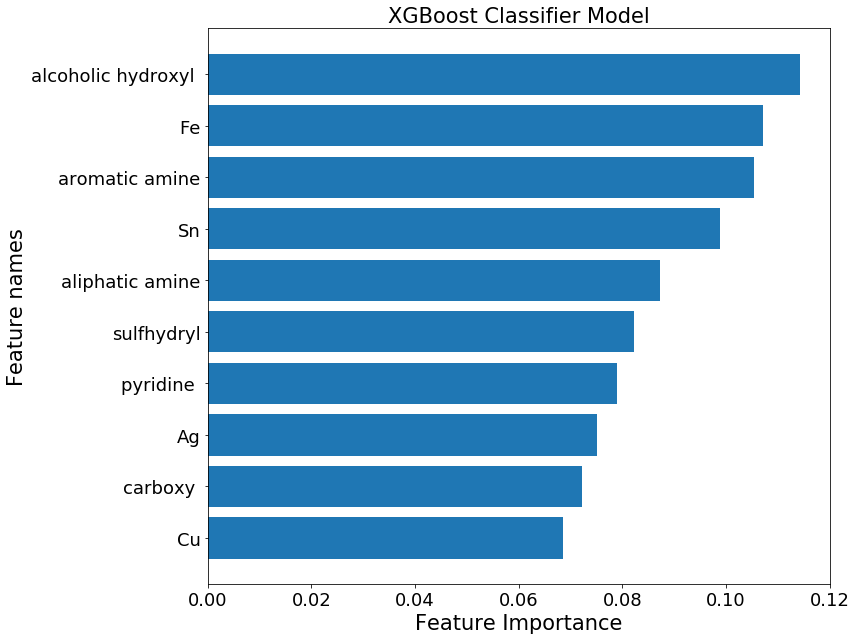

In [97]:

p = np.argsort(-clf.feature_importances_)
feat=[]
importance=[]
for i in range(10):
    print('feature_name:', title[p[i]], 'importance: ', clf.feature_importances_[p[i]])
    feat.append(title[p[i]])
    importance.append(clf.feature_importances_[p[i]])
    
feat=np.array(feat)
importance=np.array(importance)
# Plot the feature importances of the forest

sorted_idx = importance.argsort()
y_ticks = np.arange(1, len(feat)+1).flatten().tolist()

#设置输出的图片大小

fig, ax = plt.subplots(figsize=figsize)
# ax.barh(range(len(model.feature_importances_)), model.feature_importances_)
ax.barh(y_ticks, importance[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feat[sorted_idx])

font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 21,}
ax.set_xlabel('Feature Importance',font1)
ax.set_ylabel('Feature names',font1)
ax.set_title("XGBoost Classifier Model",font1)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# # 设置坐标标签字体大小
# ax.set_xlabel(..., fontsize=20)
# ax.set_ylabel(..., fontsize=20)
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=18)
fig.tight_layout()
plt.savefig(plot_xgb_name_1, dpi=600)

plt.show()

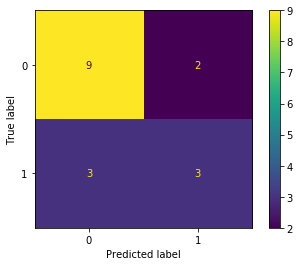

In [98]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  # doctest: +SKIP
plt.savefig(plot_xgb_name_2, bbox_inches='tight',dpi=600)
plt.show()  # doctest: +SKIP

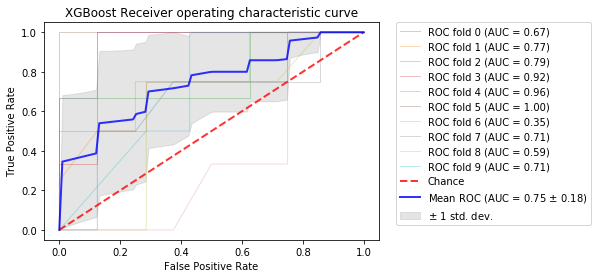

[0.66666667 0.75       0.90909091 0.72727273 0.81818182 0.90909091
 0.36363636 0.63636364 0.54545455 0.63636364]


In [99]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation
n_samples, n_features = X.shape
from sklearn.model_selection import  StratifiedKFold
n_splits=10
cv = StratifiedKFold(n_splits)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    clf.fit(X[train], y[train])
    viz = plot_roc_curve(clf, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="XGBoost Receiver operating characteristic curve")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(plot_xgb_name_3, bbox_inches='tight',dpi=600)
plt.show()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=10)
print(scores)
